In [2]:
import dedalus.public as de
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import glob

In [3]:
print(os.getcwd())

folder = 'Re750/'

prefix_ast = './' + folder + "*"

print(prefix_ast)

folders = sorted(glob.glob(prefix_ast), key=lambda folder: int(folder.split("_")[-1]))
folders.insert(0,folders[-1])
del folders[-1]

print(folders)


/Users/John1/leavitt/GQL_TC/python
./Re750/*
['./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32', './Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_1_Lambdat_1', './Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_3_Lambdat_3', './Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_6_Lambdat_6', './Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_9_Lambdat_9', './Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_12_Lambdat_12', './Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_15_Lambdat_15', './Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_32_Lambdat_32']


./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32
./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_1_Lambdat_1
1
./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_3_Lambdat_3
3
./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_6_Lambdat_6
6
./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_9_Lambdat_9
9
./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_12_Lambdat_12
12
./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_15_Lambdat_15
15
./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_32_Lambdat_32
32


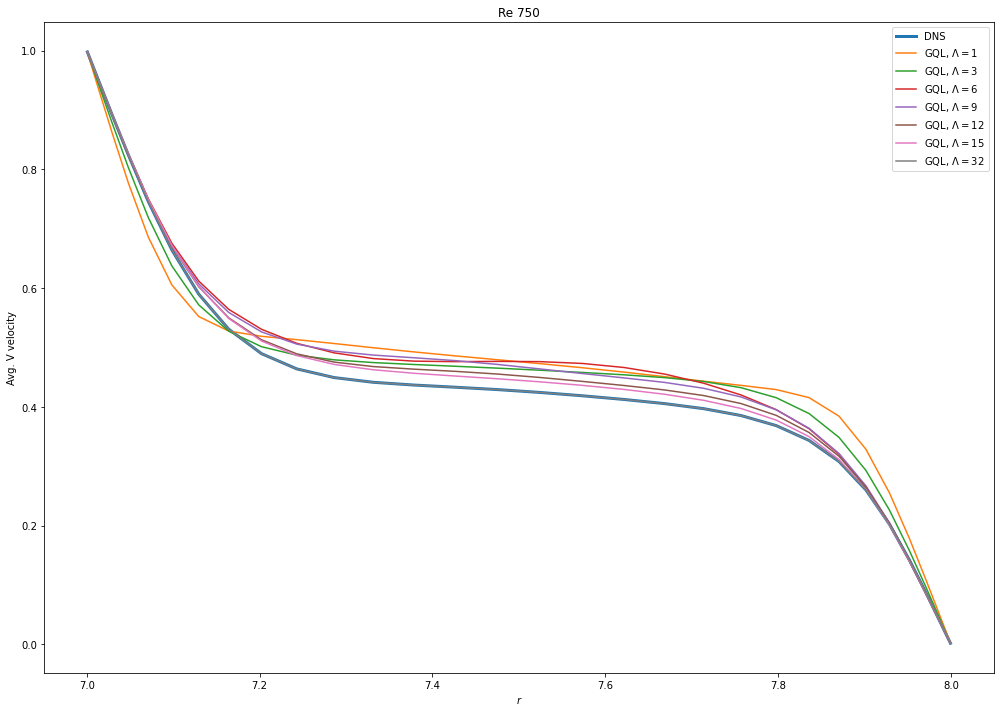

/var/folders/c2/yhyz88v145qf1hvpjgtwf2900000gq/T/ipykernel_94182/2841233226.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  GQL_arr = np.array(GQL_arr)


In [4]:
GQL_arr = []
DNS_arr = []

f = plt.figure()
f.set_figwidth(14)
f.set_figheight(10)

for folder in folders:
    print(folder)
    slices = folder + "/slices/slices_s1.h5"
    datafile = h5py.File(slices,'r')
    r_vs_v_plane_avg = datafile['tasks/v_tot'][0:,0,0,:].mean(axis=0) # [-1,0,:,:]
    #print(datafile['tasks/v_tot'][-9:,0,:,:].mean(axis=0)[0])
    #print(datafile['tasks/v_tot'][-1,0,:,:].mean(axis=0))
    r = datafile['scales/r/1.0'][:]
    #print(len(r))
    #print(r)
    if "GQL" not in folder:
        plt.plot(r,r_vs_v_plane_avg,label="DNS", linewidth=3)
        DNS_arr.append(r_vs_v_plane_avg)
    else:
        plt.plot(r,r_vs_v_plane_avg,label="GQL, $\Lambda = " + folder.split("_")[-1] + "$")
        GQL_arr.append([folder.split("_")[-1], r_vs_v_plane_avg])
        print(folder.split("_")[-1])

plt.legend()

plt.title("Re 750")
plt.xlabel("$r$")
plt.ylabel("Avg. V velocity")
plt.tight_layout()
plt.style.use('prl')
plt.show()

GQL_arr = np.array(GQL_arr)
DNS_arr = np.array(DNS_arr)

#print(type(GQL_arr))

#print(GQL_arr)
#print(DNS_arr)

In [5]:
nr = 32
R1 = 7
R2 = 8

r = de.Chebyshev('r', nr, interval=(R1,R2))
d = de.Domain([r], grid_dtype=np.float)

v_r_DNS = d.new_field()
v_r_GQL = d.new_field()

r = d.grid(0)

/var/folders/c2/yhyz88v145qf1hvpjgtwf2900000gq/T/ipykernel_94182/3182081414.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d = de.Domain([r], grid_dtype=np.float)


In [6]:
v_r_DNS['g'] = DNS_arr[0]

#print(v_r_DNS['g'])

v_r_GQL['g'] = GQL_arr[0][1]

derived_field = ((v_r_GQL - v_r_DNS)**2).evaluate() # must call evaluate()

integ_derived_field = derived_field.integrate()

derived_field['g'][0]

4.0205840222070927e-07

In [8]:
lambda_vals = np.array([1,3,6,9,12,15,32])
l2_vals = np.zeros(7)
for i in range(len(GQL_arr)):
    v_r_DNS['g'] = DNS_arr[0]

    #print(v_r_DNS['g'])

    print(GQL_arr[i][0])

    v_r_GQL['g'] = GQL_arr[i][1]

    derived_field = ((v_r_GQL - v_r_DNS)**2).evaluate() # must call evaluate()

    integ_derived_field = derived_field.integrate()

    print(derived_field['g'][0])

    l2_vals[i] = integ_derived_field['g'][0]

1
4.0205840222070927e-07
3
8.226277691705092e-08
6
1.1545216298009409e-10
9
6.365095079290508e-10
12
1.3854220621742873e-10
15
2.488545431056583e-10
32
1.9372856406554412e-14


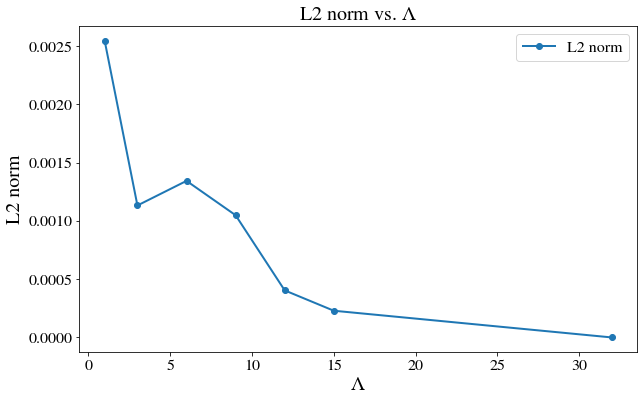

In [9]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.plot(lambda_vals, l2_vals, label = 'L2 norm', marker = 'o')

plt.legend()

plt.title("L2 norm vs. $\Lambda$")
plt.xlabel("$\Lambda$")
plt.ylabel("L2 norm")
plt.style.use('prl')
plt.show()

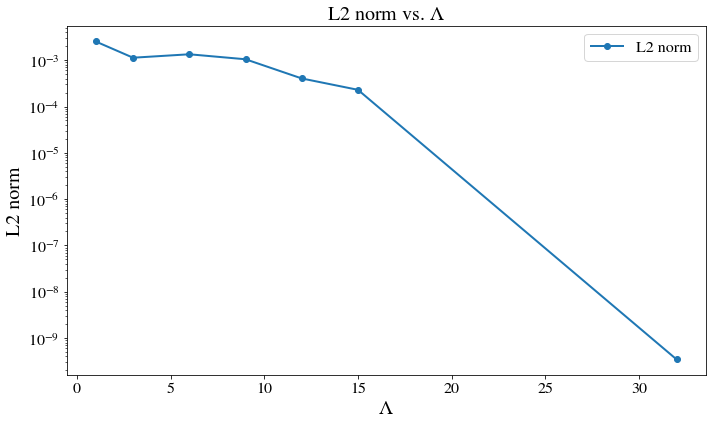

In [10]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.semilogy(lambda_vals, l2_vals, label = 'L2 norm', marker = 'o')

plt.legend()

plt.title("L2 norm vs. $\Lambda$")
plt.xlabel("$\Lambda$")
plt.ylabel("L2 norm")
plt.tight_layout()
plt.style.use('prl')
plt.show()

In [21]:
def plot_v_vs_r(folders, time_average_index):
    GQL_arr = []
    DNS_arr = []

    f = plt.figure()
    f.set_figwidth(14)
    f.set_figheight(10)

    for folder in folders:
        print(folder)
        slices = folder + "/slices/slices_s1.h5"
        datafile = h5py.File(slices,'r')
        r_vs_v_plane_avg = datafile['tasks/v_tot'][time_average_index:,0,0,:].mean(axis=0) # [-1,0,:,:]
        print(len(datafile['tasks/v_tot'][:,0,0,0]))
        r = datafile['scales/r/1.0'][:]
        if "GQL" not in folder:
            plt.plot(r,r_vs_v_plane_avg,label="DNS", linewidth=3)
            DNS_arr.append(r_vs_v_plane_avg)
        else:
            plt.plot(r,r_vs_v_plane_avg,label="GQL, $\Lambda = " + folder.split("_")[-1] + "$")
            GQL_arr.append([folder.split("_")[-1], r_vs_v_plane_avg])
            print(folder.split("_")[-1])

    plt.legend()

    plt.title(folders[0].split('/')[1])
    plt.xlabel("$r$")
    plt.ylabel("Avg. V velocity")
    plt.tight_layout()
    plt.style.use('prl')
    plt.show()

    GQL_arr = np.array(GQL_arr)
    DNS_arr = np.array(DNS_arr)

    nr = 32
    R1 = 7
    R2 = 8

    r = de.Chebyshev('r', nr, interval=(R1,R2))
    d = de.Domain([r], grid_dtype=np.float)

    lambda_vals = np.array([1,3,6,9,12,15,32])
    l2_vals = np.zeros(7)
    
    for i in range(len(GQL_arr)):
        v_r_DNS['g'] = DNS_arr[0]

        #print(v_r_DNS['g'])

        print(GQL_arr[i][0])

        v_r_GQL['g'] = GQL_arr[i][1]

        derived_field = ((v_r_GQL - v_r_DNS)**2).evaluate() # must call evaluate()

        integ_derived_field = derived_field.integrate()

        print(integ_derived_field['g'][0])

        l2_vals[i] = integ_derived_field['g'][0]

    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(6)

    plt.plot(lambda_vals, l2_vals, label = 'L2 norm', marker = 'o')

    plt.legend()

    plt.title("L2 norm vs. $\Lambda$")
    plt.xlabel("$\Lambda$")
    plt.ylabel("L2 norm")
    plt.tight_layout()
    plt.style.use('prl')
    plt.show()

    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(6)

    plt.semilogy(lambda_vals, l2_vals, label = 'L2 norm', marker = 'o')

    plt.legend()

    plt.title("L2 norm vs. $\Lambda$")
    plt.xlabel("$\Lambda$")
    plt.ylabel("L2 norm")
    plt.tight_layout()
    plt.style.use('prl')
    plt.show()

In [23]:
#plot_v_vs_r(folders, 0)

In [24]:
#plot_v_vs_r(folders, -1)

./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32
150
./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_1_Lambdat_1
150
1
./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_3_Lambdat_3
150
3
./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_6_Lambdat_6
150
6
./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_9_Lambdat_9
150
9
./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_12_Lambdat_12
150
12
./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_15_Lambdat_15
150
15
./Re750/TC_3d_re_7.500000e+02_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_32_Lambdat_32
150
32


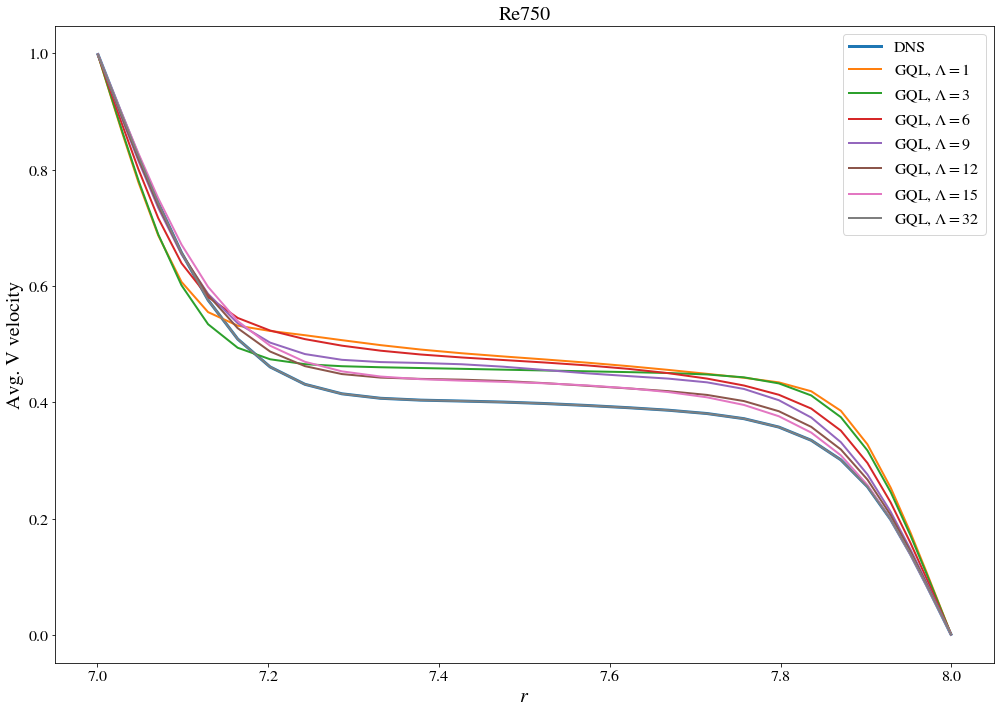

/var/folders/c2/yhyz88v145qf1hvpjgtwf2900000gq/T/ipykernel_94182/2609436514.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  GQL_arr = np.array(GQL_arr)
/var/folders/c2/yhyz88v145qf1hvpjgtwf2900000gq/T/ipykernel_94182/2609436514.py:41: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d = de.Domain([r], grid_dtype=np.float)


1
0.004862397764825203
3
0.002933360991877021
6
0.0034945034154181937
9
0.002129534287071586
12
0.0007541091282176481
15
0.0007799737866674855
32
1.3447033669592487e-09


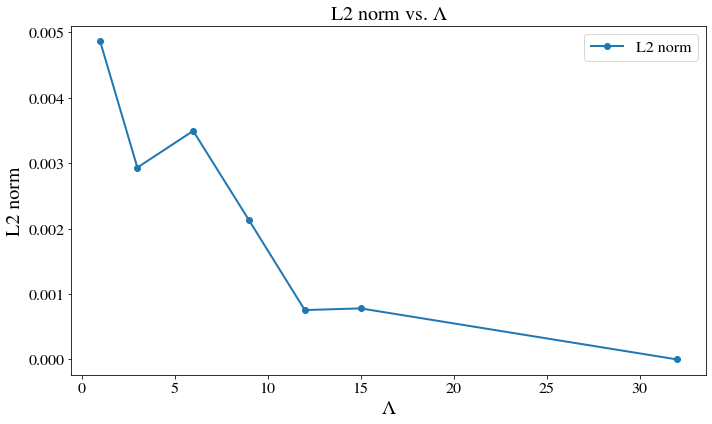

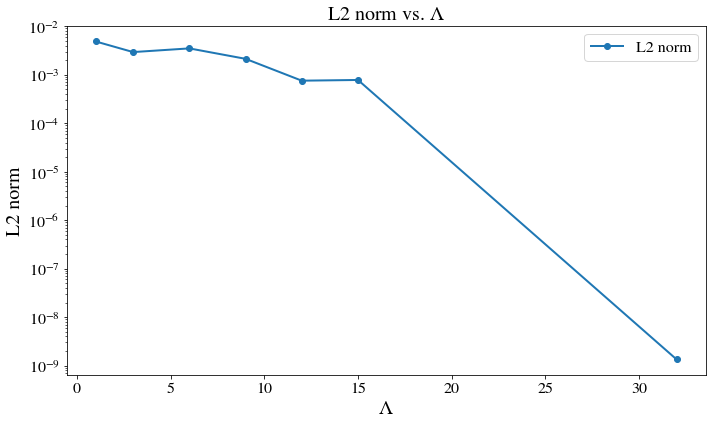

In [25]:
plot_v_vs_r(folders, -10)

In [27]:
#plot_v_vs_r(folders, -100)

In [28]:
#plot_v_vs_r(folders, -500)

In [29]:
print(os.getcwd())

folder = 'Re1000/'

prefix_ast = './' + folder + "*"

print(prefix_ast)

folders = sorted(glob.glob(prefix_ast), key=lambda folder: int(folder.split("_")[-1]))
print(folders)
if 'GQL' not in folders[-1]:
    folders.insert(0,folders[-1])
    del folders[-1]
else:
    folders.insert(0,folders[-2])
    del folders[-2]

print(folders)

/Users/John1/leavitt/GQL_TC/python
./Re1000/*
['./Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_1_Lambdat_1', './Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_3_Lambdat_3', './Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_6_Lambdat_6', './Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_9_Lambdat_9', './Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_12_Lambdat_12', './Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_15_Lambdat_15', './Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32', './Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_32_Lambdat_32']
['./Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32', './Re1000/TC_3d_re_1.0

In [30]:
#plot_v_vs_r(folders, 0)

In [31]:
#plot_v_vs_r(folders, -1)

./Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32
150
./Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_1_Lambdat_1
150
1
./Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_3_Lambdat_3
150
3
./Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_6_Lambdat_6
150
6
./Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_9_Lambdat_9
150
9
./Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_12_Lambdat_12
150
12
./Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_15_Lambdat_15
94
15
./Re1000/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_32_Lambdat_32
150
32


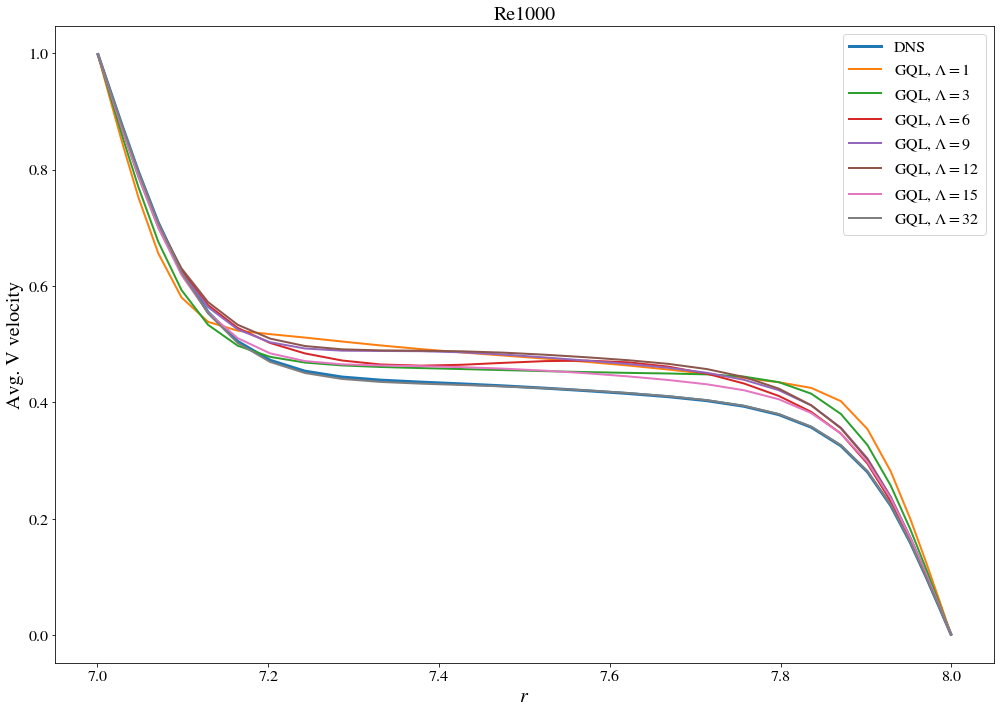

/var/folders/c2/yhyz88v145qf1hvpjgtwf2900000gq/T/ipykernel_94182/2609436514.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  GQL_arr = np.array(GQL_arr)
/var/folders/c2/yhyz88v145qf1hvpjgtwf2900000gq/T/ipykernel_94182/2609436514.py:41: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d = de.Domain([r], grid_dtype=np.float)


1
0.002604578032690295
3
0.0011151113788432628
6
0.0010782718159135707
9
0.00161548566180769
12
0.001886038814187289
15
0.000504771368211462
32
3.0269491179566402e-06


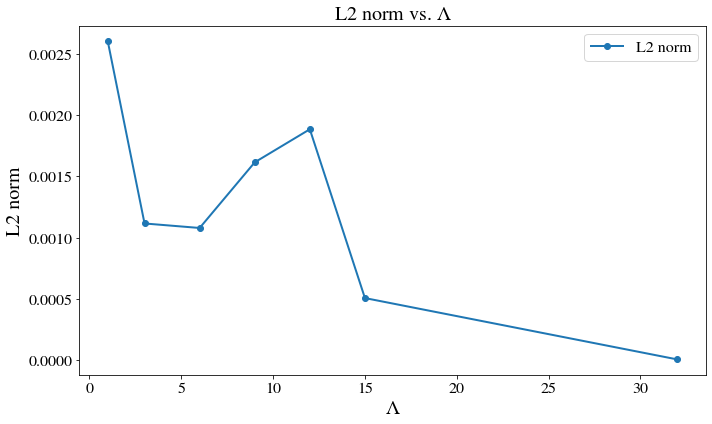

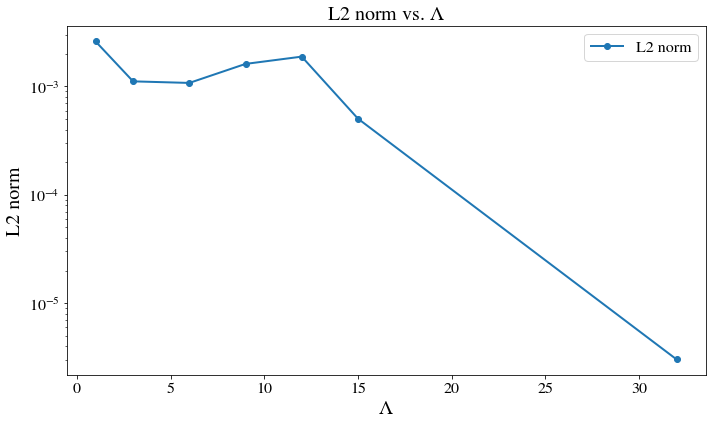

In [32]:
plot_v_vs_r(folders, -10)

In [33]:
#plot_v_vs_r(folders, -100)

In [34]:
#plot_v_vs_r(folders, -500)

In [35]:
print(os.getcwd())

folder = 'Re1500/'

prefix_ast = './' + folder + "*"

print(prefix_ast)

folders = sorted(glob.glob(prefix_ast), key=lambda folder: int(folder.split("_")[-1]))
print(folders)
if 'GQL' not in folders[-1]:
    folders.insert(0,folders[-1])
    del folders[-1]
else:
    folders.insert(0,folders[-2])
    del folders[-2]

print(folders)

/Users/John1/leavitt/GQL_TC/python
./Re1500/*
['./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_1_Lambdat_1', './Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_3_Lambdat_3', './Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_6_Lambdat_6', './Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_9_Lambdat_9', './Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_12_Lambdat_12', './Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_15_Lambdat_15', './Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32', './Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_32_Lambdat_32']
['./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32', './Re1500/TC_3d_re_1.5

./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32
150
./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_1_Lambdat_1
150
1
./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_3_Lambdat_3
150
3
./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_6_Lambdat_6
150
6
./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_9_Lambdat_9
150
9
./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_12_Lambdat_12
150
12
./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_15_Lambdat_15
150
15
./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_32_Lambdat_32
150
32


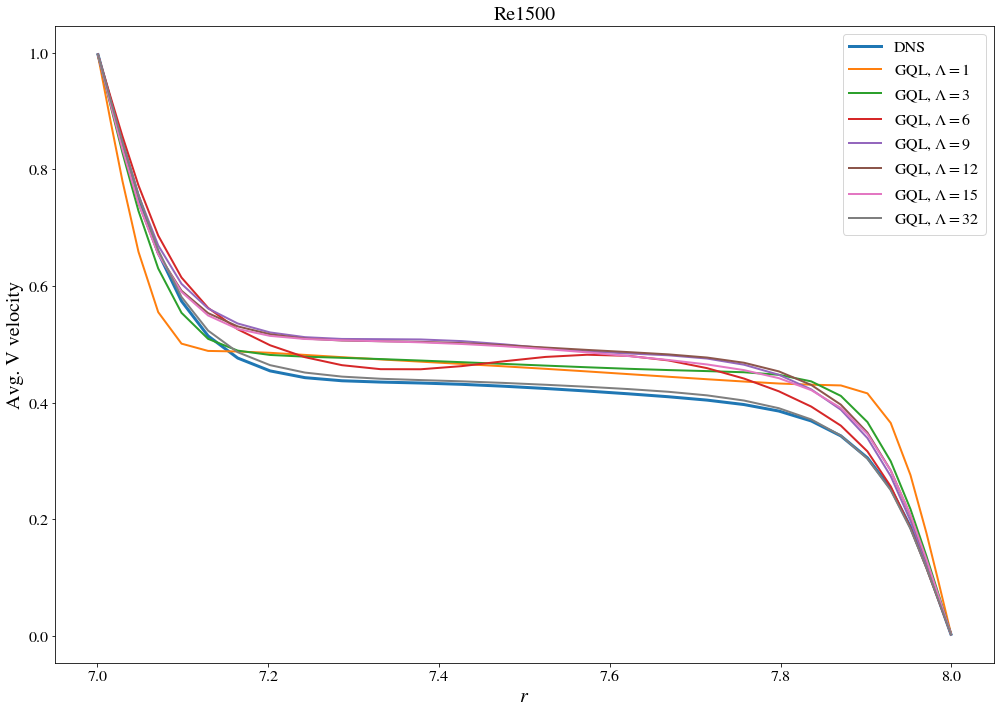

/var/folders/c2/yhyz88v145qf1hvpjgtwf2900000gq/T/ipykernel_94182/2609436514.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  GQL_arr = np.array(GQL_arr)
/var/folders/c2/yhyz88v145qf1hvpjgtwf2900000gq/T/ipykernel_94182/2609436514.py:41: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d = de.Domain([r], grid_dtype=np.float)


1
0.0028692150939071343
3
0.0017392715741509372
6
0.0016035486561838744
9
0.0035890512431294595
12
0.0036084768462083697
15
0.003129950098092127
32
4.137494303799043e-05


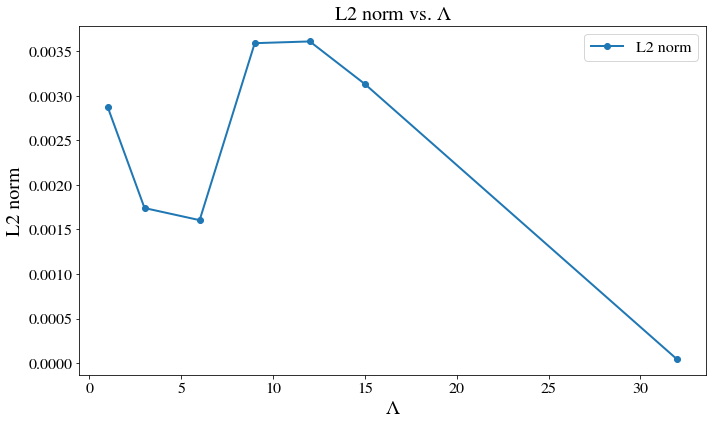

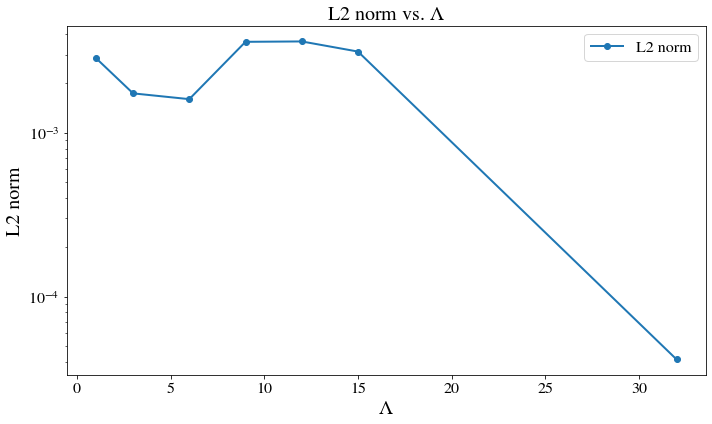

In [36]:
plot_v_vs_r(folders, -10)

./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32
150
./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_1_Lambdat_1
150
1
./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_3_Lambdat_3
150
3
./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_6_Lambdat_6
150
6
./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_9_Lambdat_9
150
9
./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_12_Lambdat_12
150
12
./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_15_Lambdat_15
150
15
./Re1500/TC_3d_re_1.500000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_32_32_GQL_Lambdaz_32_Lambdat_32
150
32


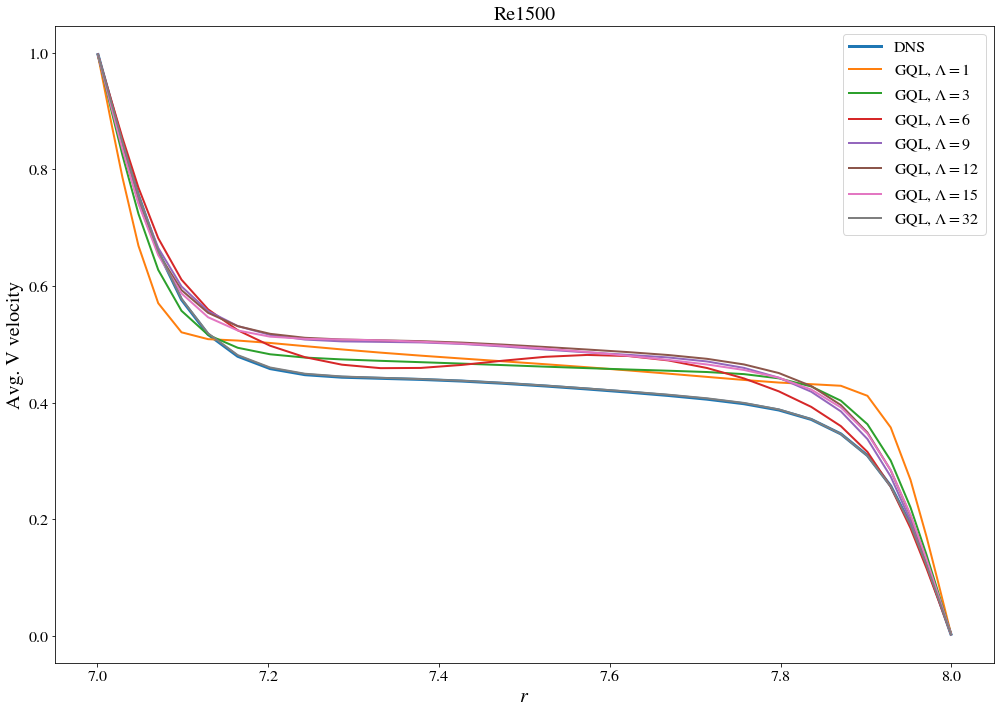

/var/folders/c2/yhyz88v145qf1hvpjgtwf2900000gq/T/ipykernel_94182/2609436514.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  GQL_arr = np.array(GQL_arr)
/var/folders/c2/yhyz88v145qf1hvpjgtwf2900000gq/T/ipykernel_94182/2609436514.py:41: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d = de.Domain([r], grid_dtype=np.float)


1
0.002719007888718758
3
0.0013232189658208375
6
0.0013589666147401272
9
0.0027872632282229383
12
0.0032007194736009673
15
0.002778082605198614
32
1.1855213712256098e-06


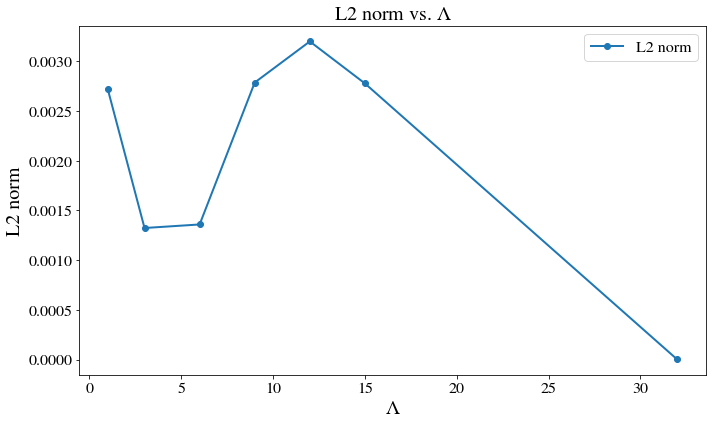

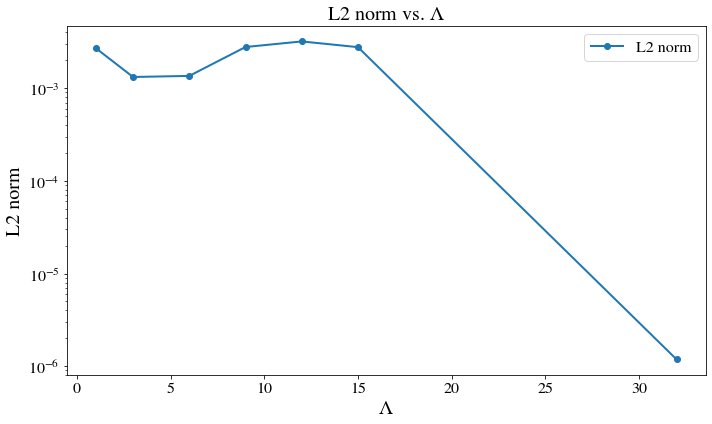

In [37]:
plot_v_vs_r(folders, -100)

In [40]:
print(os.getcwd())

folder = 'Re1000theta64/'

prefix_ast = './' + folder + "*"

print(prefix_ast)

folders = sorted(glob.glob(prefix_ast), key=lambda folder: int(folder.split("_")[-1]))
print(folders)
# if 'GQL' not in folders[-1]:
#     folders.insert(0,folders[-1])
#     del folders[-1]
# else:
#     folders.insert(0,folders[-2])
#     del folders[-2]

print(folders)

/Users/John1/leavitt/GQL_TC/python
./Re1000theta64/*
['./Re1000theta64/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_64_32_GQL_Lambdaz_3_Lambdat_3', './Re1000theta64/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_64_32_GQL_Lambdaz_6_Lambdat_6', './Re1000theta64/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_64_32_GQL_Lambdaz_9_Lambdat_9', './Re1000theta64/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_64_32_GQL_Lambdaz_12_Lambdat_12', './Re1000theta64/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_64_32_GQL_Lambdaz_15_Lambdat_15']
['./Re1000theta64/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_64_32_GQL_Lambdaz_3_Lambdat_3', './Re1000theta64/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_64_32_GQL_Lambdaz_6_Lambdat_6', './Re1000theta64/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_64_32_GQL_Lambdaz_9_Lambdat_9', './Re1000theta64/TC_3

./Re1000theta64/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_64_32_GQL_Lambdaz_3_Lambdat_3
150
3
./Re1000theta64/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_64_32_GQL_Lambdaz_6_Lambdat_6
150
6
./Re1000theta64/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_64_32_GQL_Lambdaz_9_Lambdat_9
150
9
./Re1000theta64/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_64_32_GQL_Lambdaz_12_Lambdat_12
150
12
./Re1000theta64/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_32_64_32_GQL_Lambdaz_15_Lambdat_15
150
15


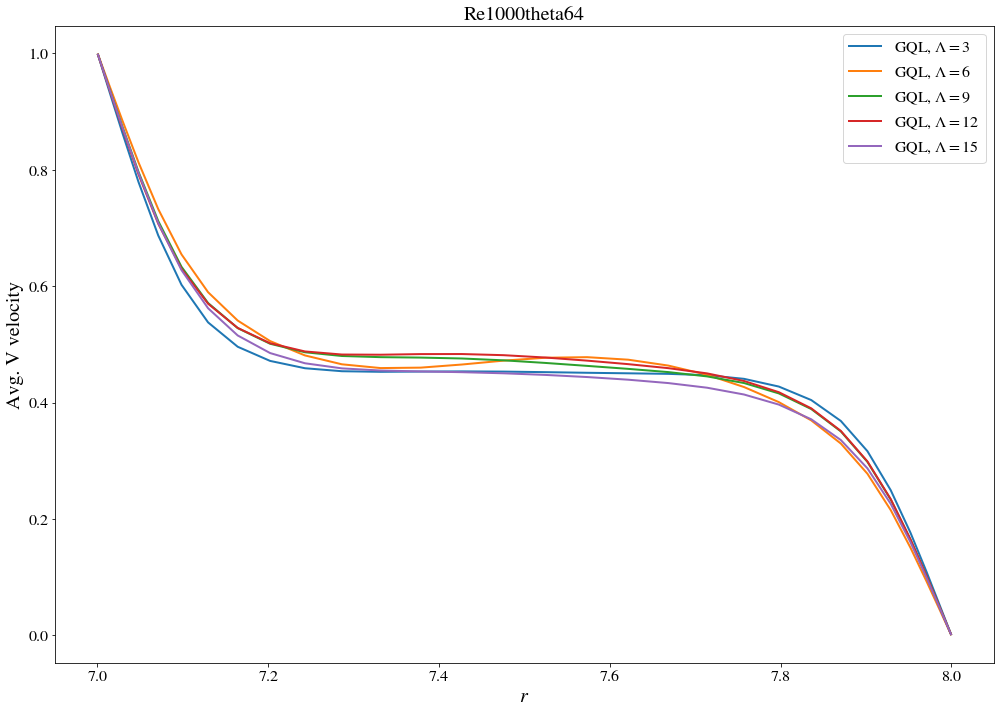

/var/folders/c2/yhyz88v145qf1hvpjgtwf2900000gq/T/ipykernel_94182/2609436514.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  GQL_arr = np.array(GQL_arr)
/var/folders/c2/yhyz88v145qf1hvpjgtwf2900000gq/T/ipykernel_94182/2609436514.py:41: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d = de.Domain([r], grid_dtype=np.float)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [41]:
plot_v_vs_r(folders, -10)